In [1]:
import os # this is a package that allows me to use the "os" (operating system) commands
import matplotlib.pyplot as plt # used for plotting
import numpy as np # used for manupulating numbers

In [2]:
list_of_files = ['BWX3370_xyl90min_rep3-1k_overlap.hm_corrected','BWX3370_xyl90min_rep4-1k_overlap.hm_corrected',
                 'BWX5490_xyl90min_rep2-1k_overlap.hm_corrected','BWX5490_xyl90min_rep3-1k_overlap.hm_corrected',
                 'BWX5556_xyl90min_rep5-1k_overlap.hm_corrected','BWX5556_xyl90min_rep6-1k_overlap.hm_corrected',
                 'BWX5558_xyl90min_rep1-1k_overlap.hm_corrected','BWX5558_xyl90min_rep3-1k_overlap.hm_corrected'
]


In [3]:
skip_N_diags = 3 # number of diagonal elements to skip (i.e. before plotting Pc(s))
#N = 317 # number of elements of matrices

# function that computes the scaling
def getScaling(inMatrix,measureType='sum',scaleType='log',doCircular=True):
    """
    Function that computes the Pc(s) curves.
    
    Parameters
    ----------
    inMatrix : numpy array
        An N by N array of Hi-C data
        
    measureType : {'sum', 'median'}
        Computes the scaling using the sum of elements over each diagonal, or the median.
        Sum is default.
        
    
    scaleType : {'log', 'linear'}
        Bins the Hi-C values in a logarithmically, or linearly spaced scale. Log is default.
        
    Output
    ------
    Pc : numpy array of contact frequencies
    mids : numpy array of genomic bins (distances)
    
    """
    inMatrix = np.array(inMatrix, dtype = np.double)
    N = len(inMatrix)    
        
    marginals = np.sum(inMatrix, axis=0)
    mask = marginals > 0 
    mask2d = mask[:,None] * mask[None,:]
    
    if scaleType=='log':
        bins = np.logspace(np.log10(skip_N_diags),np.log10(N),num=20)  # creates logarithmically spaced bins
        bins = np.array(np.round(bins),dtype=int)  # make bins into integer values

    else:
        bins = np.arange(0,N)
        
    mids = 0.5 * (bins[:-1] + bins[1:])
    Pc = [] 
    for st, end in zip(bins[:-1], bins[1:]):
        curmean = 0
        maskmean = 0
        for i in range(st, end):
            if measureType == 'median':
                curmean += np.median(np.diagonal(inMatrix, i))
                maskmean += np.median(np.diagonal(mask2d, i))
            else:
                curmean += np.nansum(np.diagonal(inMatrix, i))
                maskmean += np.nansum(np.diagonal(mask2d, i))
            if doCircular == True:
                if measureType == 'median':
                    curmean += np.median(np.diagonal(inMatrix,len(inMatrix)-i))
                    maskmean += np.median(np.diagonal(mask2d, len(inMatrix)-i))
                else:
                    curmean += np.nansum(np.diagonal(inMatrix, len(inMatrix)-i))
                    maskmean += np.nansum(np.diagonal(mask2d, len(inMatrix)-i))
        Pc.append(curmean / maskmean)
    mids = np.r_[mids, N]
    Pc = np.r_[Pc, np.sqrt((Pc[-1] / Pc[-2])) * Pc[-1]]
    return Pc, mids


## Plot scaling for each Hi-C matrix

## Plot contact frequency in kilobases

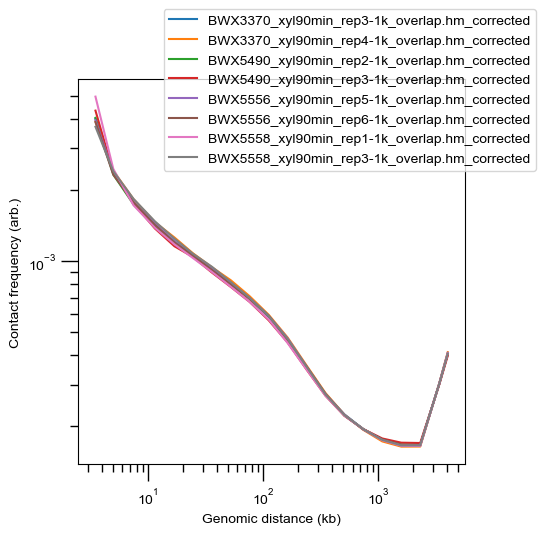

In [7]:
plt.figure(figsize=(5,5))

bins_to_kb_factor = 1 # 1 bin is 10 kb
for file in list_of_files: 
    M = np.loadtxt(file) # loads the Hi-C matrix   
    Pc, mids = getScaling(M) # computes the scaling    
    plt.loglog(mids*bins_to_kb_factor, Pc,label=file)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.tick_params(axis='both',length=12, width=1)
plt.tick_params(axis='both',length=6, width=1, which='minor')
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.xlabel('Genomic distance (kb)')
plt.ylabel('Contact frequency (arb.)')
plt.savefig("Pc(S) kb of NAP two replicates new 1k.pdf")

/var/folders/p1/_98tvzfj397d9y02_3phmnl80000gn/T/ipykernel_20670/1058439387.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,30)


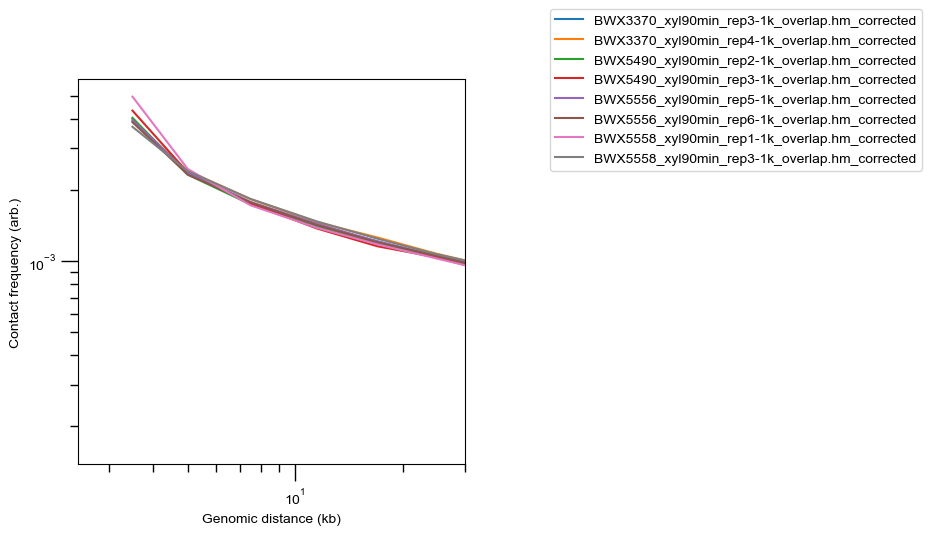

In [8]:
plt.figure(figsize=(5,5))

bins_to_kb_factor = 1 # 1 bin is 10 kb
for file in list_of_files: 
    M = np.loadtxt(file) # loads the Hi-C matrix   
    Pc, mids = getScaling(M) # computes the scaling    
    plt.loglog(mids*bins_to_kb_factor, Pc,label=file)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.tick_params(axis='both',length=12, width=1)
plt.tick_params(axis='both',length=6, width=1, which='minor')
plt.xlim(0,30)
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.xlabel('Genomic distance (kb)')
plt.ylabel('Contact frequency (arb.)')
plt.savefig("Pc(S) kb of NAP two replicates new 1k 30kb.pdf")